# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
import os
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.optimizers import Adam


### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [2]:
# Define a function to load data and aggregate them
def data_loading_function(file_paths):
    dfs = []
    for path in file_paths:
        df = pd.read_csv(path)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


In [3]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
file_paths = [
    r"F:\IIITBangloreAIML\20. RNN\Assignment\RNN_Stock_Starter_Dataset\RNN_Stocks_Data\AMZN_stocks_data.csv",
    r"F:\IIITBangloreAIML\20. RNN\Assignment\RNN_Stock_Starter_Dataset\RNN_Stocks_Data\GOOGL_stocks_data.csv",
    r"F:\IIITBangloreAIML\20. RNN\Assignment\RNN_Stock_Starter_Dataset\RNN_Stocks_Data\IBM_stocks_data.csv",
    r"F:\IIITBangloreAIML\20. RNN\Assignment\RNN_Stock_Starter_Dataset\RNN_Stocks_Data\MSFT_stocks_data.csv"
]
dataset = data_loading_function(file_paths)

In [4]:
dataset.iloc[:,:]

Date   Open   High    Low  Close    Volume  Name
0      2006-01-03  47.47  47.85  46.25  47.58   7582127  AMZN
1      2006-01-04  47.48  47.73  46.69  47.25   7440914  AMZN
2      2006-01-05  47.16  48.20  47.11  47.65   5417258  AMZN
3      2006-01-06  47.97  48.58  47.32  47.87   6154285  AMZN
4      2006-01-09  46.55  47.10  46.40  47.08   8945056  AMZN
...           ...    ...    ...    ...    ...       ...   ...
12072  2017-12-22  85.40  85.63  84.92  85.51  14145841  MSFT
12073  2017-12-26  85.31  85.53  85.03  85.40   9891237  MSFT
12074  2017-12-27  85.65  85.98  85.22  85.71  14678025  MSFT
12075  2017-12-28  85.90  85.93  85.55  85.72  10594344  MSFT
12076  2017-12-29  85.63  86.05  85.50  85.54  18717406  MSFT

[12077 rows x 7 columns]

In [5]:
# checking date wise information for all the stocks on a particular day
dataset[dataset['Date']=='2006-01-03']

Date    Open    High     Low   Close    Volume   Name
0     2006-01-03   47.47   47.85   46.25   47.58   7582127   AMZN
3019  2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
6038  2006-01-03   82.45   82.55   80.81   82.06  11715200    IBM
9058  2006-01-03   26.25   27.00   26.10   26.84  79974418   MSFT

In [6]:
# View specifics of the data
print(dataset.info())
print(dataset['Name'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12077 non-null  object 
 1   Open    12076 non-null  float64
 2   High    12077 non-null  float64
 3   Low     12076 non-null  float64
 4   Close   12077 non-null  float64
 5   Volume  12077 non-null  int64  
 6   Name    12077 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 660.6+ KB
None
Name
IBM      3020
AMZN     3019
GOOGL    3019
MSFT     3019
Name: count, dtype: int64


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [7]:
# Handle Missing Values
dataset.isnull().sum()


Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

#### We have two Null Values 1st in the Open Column and Second In the Low Column

In [8]:
# dropping rows with missig values
dataset.dropna(inplace=True)

In [9]:
# checking again
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

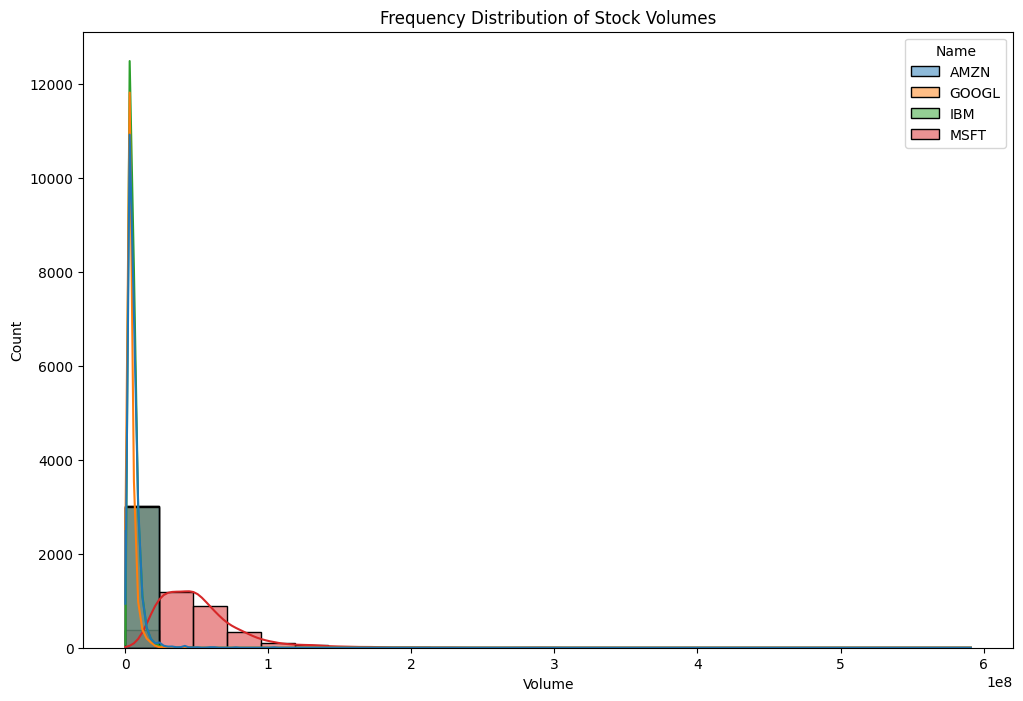

In [10]:
# Frequency distribution of volumes
plt.figure(figsize=(12, 8))
sns.histplot(data=dataset, x='Volume', bins=25, kde=True,hue='Name')
plt.title("Frequency Distribution of Stock Volumes")
plt.show()


### Checking Frequency Distribution For Individual Stock Datasets

(3019, 7)


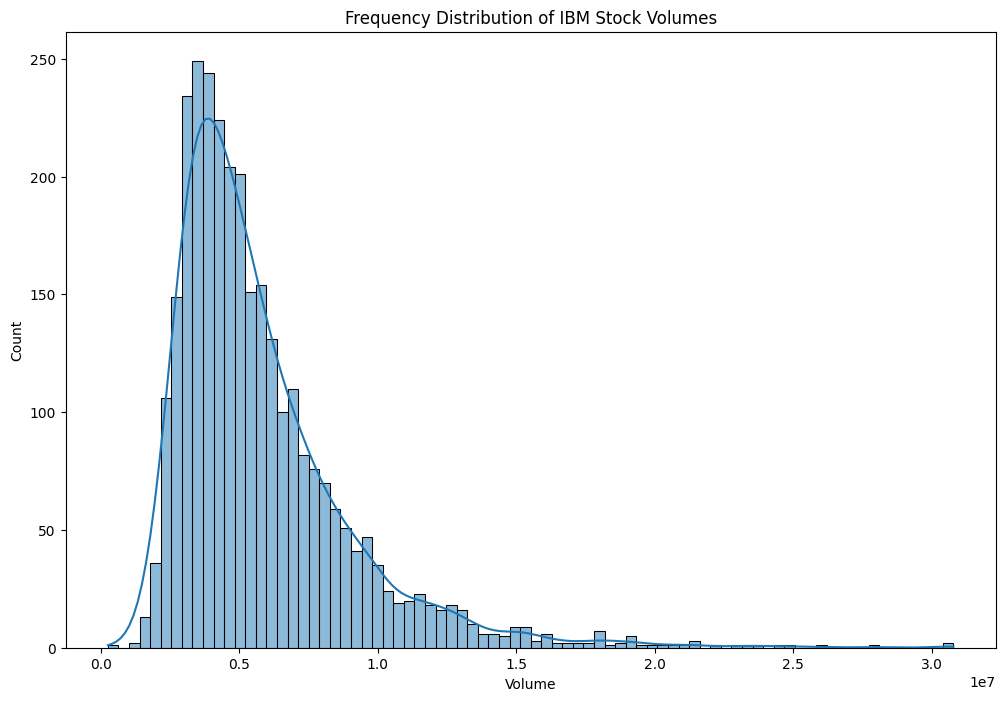

In [11]:
IBM_dataset = dataset[dataset['Name']=='IBM']
print(IBM_dataset.shape)

plt.figure(figsize=(12, 8))
sns.histplot(data=IBM_dataset, x='Volume', bins=80, kde=True)
plt.title("Frequency Distribution of IBM Stock Volumes")
plt.show()


(3019, 7)


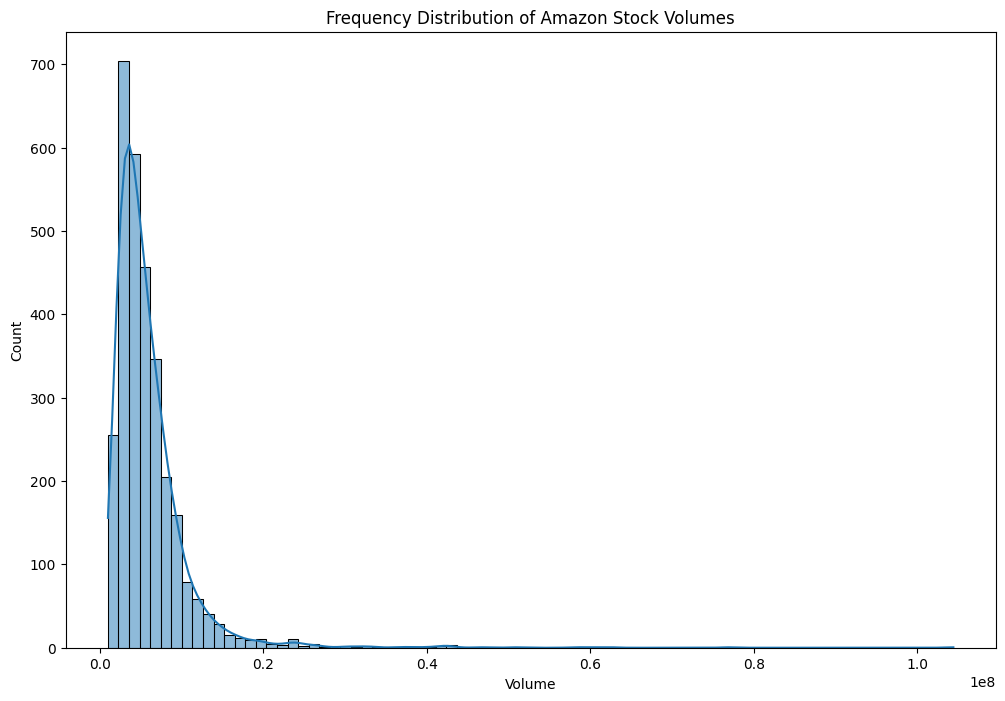

In [12]:
AMZN_dataset = dataset[dataset['Name']=='AMZN']
print(AMZN_dataset.shape)

plt.figure(figsize=(12, 8))
sns.histplot(data=AMZN_dataset, x='Volume', bins=80, kde=True)
plt.title("Frequency Distribution of Amazon Stock Volumes")
plt.show()


(3019, 7)


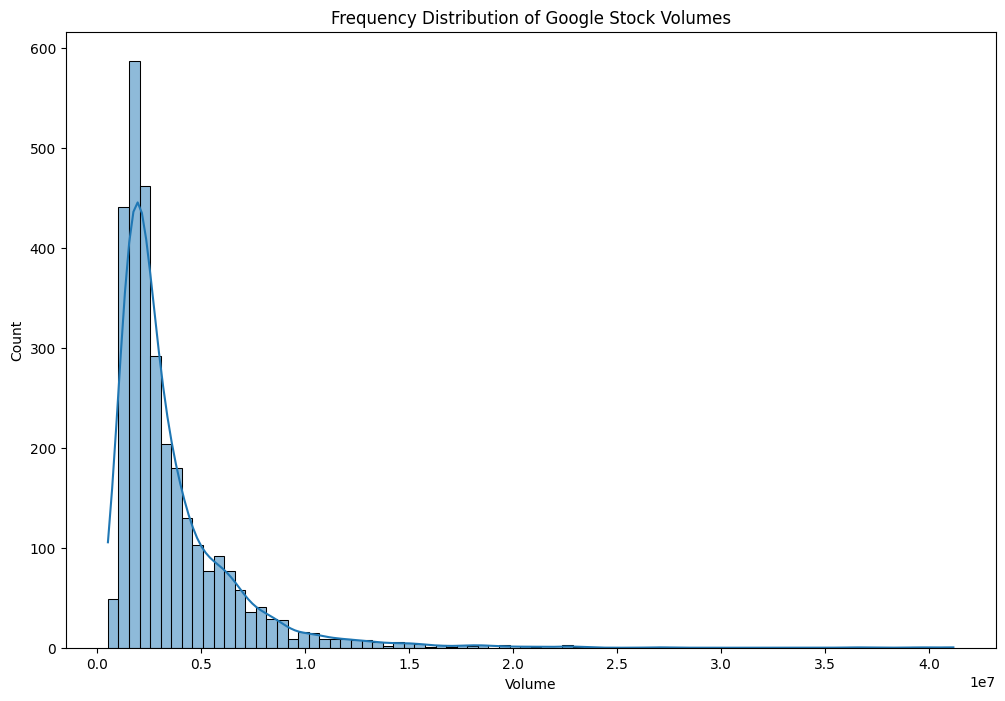

In [13]:
GOOGL_dataset = dataset[dataset['Name']=='GOOGL']
print(GOOGL_dataset.shape)

plt.figure(figsize=(12, 8))
sns.histplot(data=GOOGL_dataset, x='Volume', bins=80, kde=True)
plt.title("Frequency Distribution of Google Stock Volumes")
plt.show()


(3019, 7)


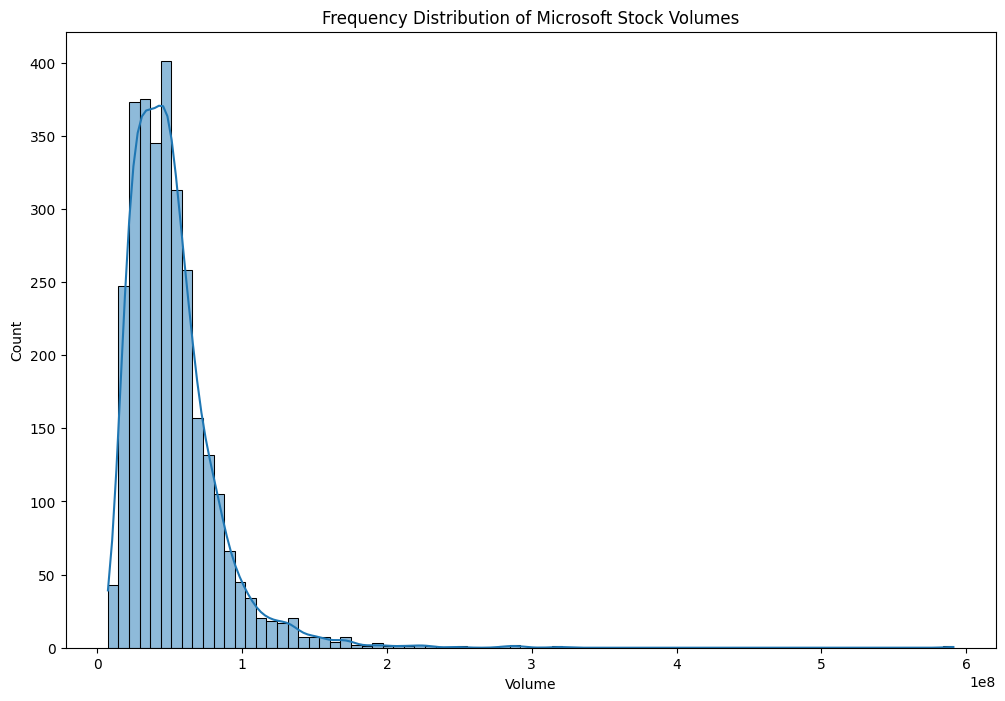

In [14]:
MSFT_dataset = dataset[dataset['Name']=='MSFT']
print(MSFT_dataset.shape)

plt.figure(figsize=(12, 8))
sns.histplot(data=MSFT_dataset, x='Volume', bins=80, kde=True)
plt.title("Frequency Distribution of Microsoft Stock Volumes")
plt.show()


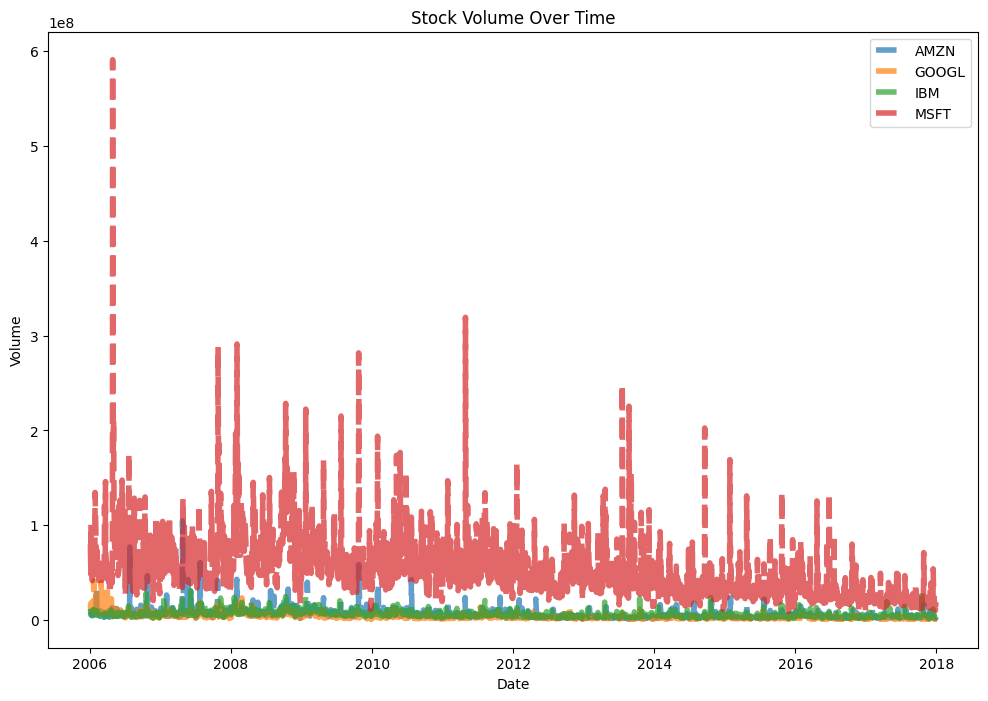

In [15]:
# Stock volume variation over time
dataset['Date'] = pd.to_datetime(dataset['Date'])

plt.figure(figsize=(12, 8))
linestyle = ['--','-_-',':','-.-']
for name in dataset['Name'].unique():
    counter = 0
    temp = dataset[dataset['Name'] == name]
    plt.plot(temp['Date'], temp['Volume'], label=name,linewidth=4,alpha=0.7,linestyle = linestyle[counter])
    counter+=1

plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()



### Creating seperate Subplots 

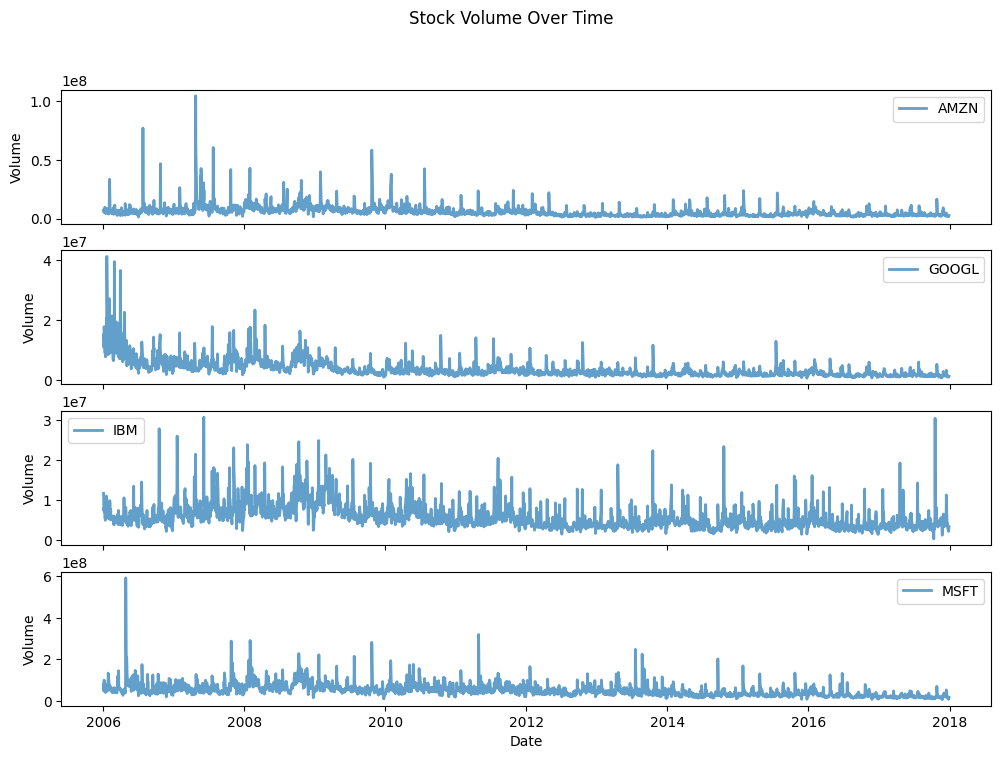

In [16]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

fig, axes = plt.subplots(nrows=len(dataset['Name'].unique()), ncols=1, figsize=(12, 8), sharex=True)


for i, name in enumerate(dataset['Name'].unique()):
    temp = dataset[dataset['Name'] == name]
    axes[i].plot(temp['Date'], temp['Volume'], label=name, linewidth=2, alpha=0.7)
    axes[i].set_ylabel('Volume')
    axes[i].legend()
    
plt.xlabel('Date')
plt.suptitle('Stock Volume Over Time')
plt.show()

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

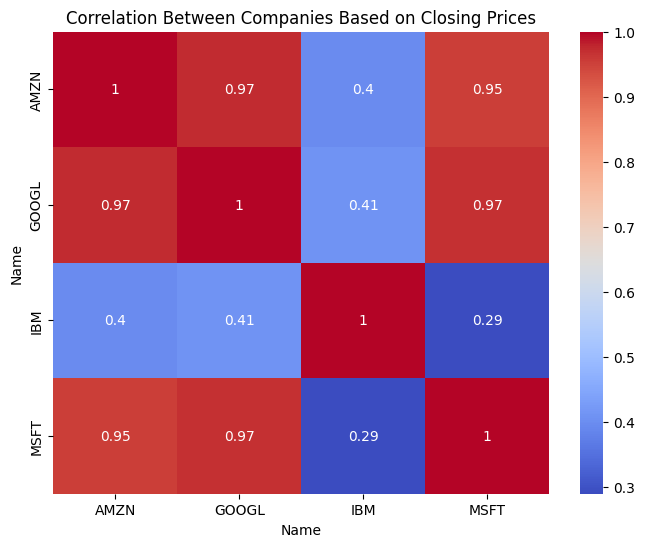

In [17]:
# Analyse correlations
pivot_df_close = dataset.pivot(index='Date', columns='Name', values='Close')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df_close.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Companies Based on Closing Prices")
plt.show()

### Google is Highly Correlated with Amazon and Microsoft in terms of Closing Stock Prices

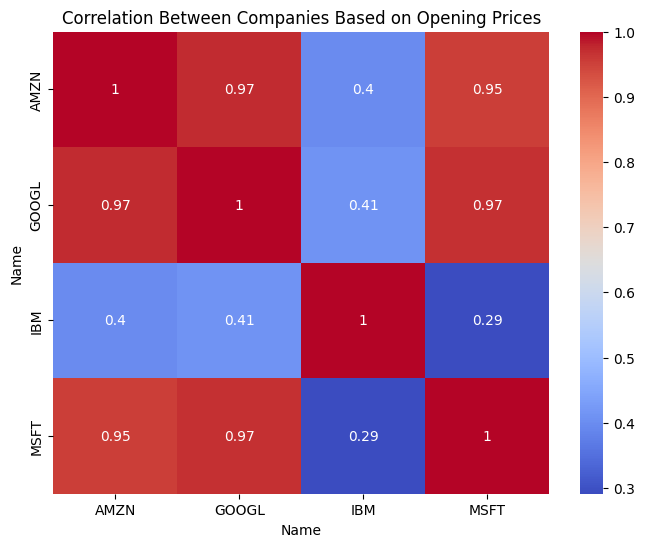

In [18]:
pivot_df_open = dataset.pivot(index='Date', columns='Name', values='Open')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df_open.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Companies Based on Opening Prices")
plt.show()

### Amazon is highly correlated with Google and Microsoft in terms of Opening Stock Prices

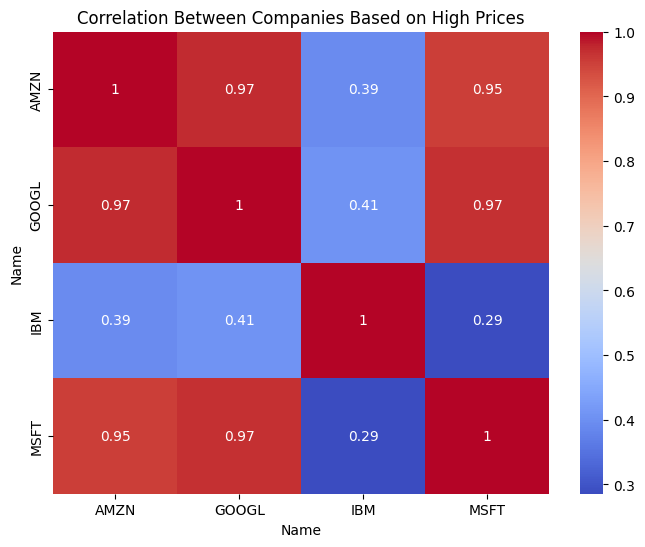

In [19]:
pivot_df_high = dataset.pivot(index='Date', columns='Name', values='High')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df_high.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Companies Based on High Prices")
plt.show()

### Amazon shares a high correlation with Google and Microsoft in terms of High Prices

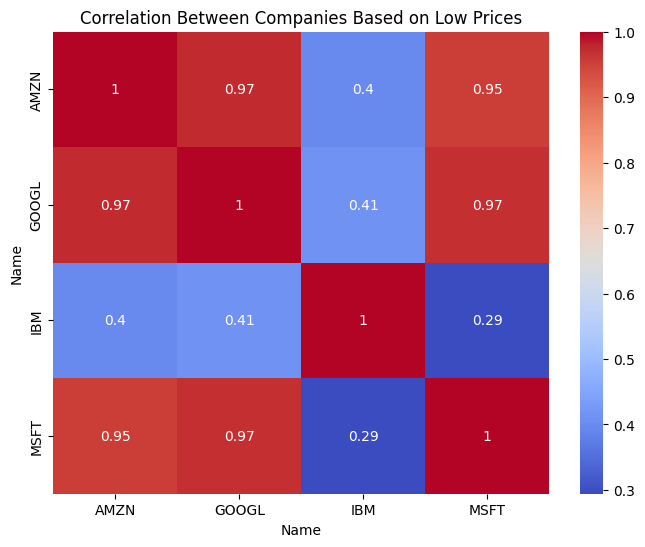

In [20]:
pivot_df_low = dataset.pivot(index='Date', columns='Name', values='Low')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df_low.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Companies Based on Low Prices")
plt.show()

### Low prices also follow the same trend as in case of Opening Prices 

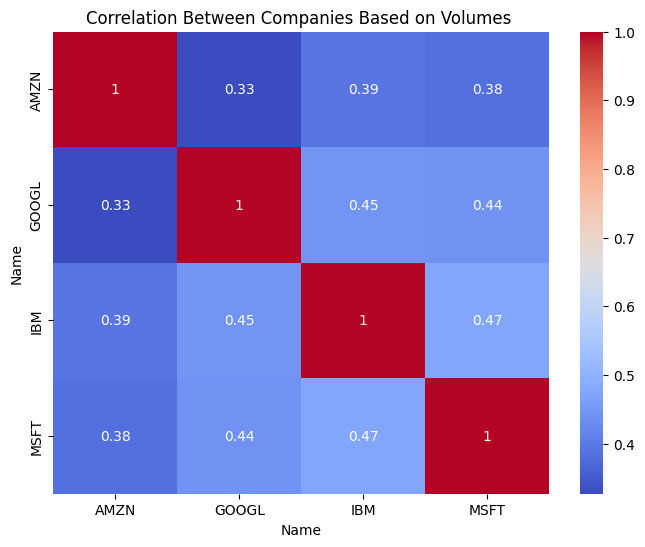

In [21]:
pivot_df_Volumes = dataset.pivot(index='Date', columns='Name', values='Volume')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df_Volumes.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Companies Based on Volumes ")
plt.show()

### Microsoft and IBM shares the Maximum correlation in terms of Volume , followed by IBM and GOOGLE , Google and Microsoft

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

### Creating a window function that will split the dataset into X , Y 
### Parameters Involved 
#### 1.Combined DataFrame
#### 2. Target Names - List of stock names that we want to predict
#### 3. Window Size - Nos of the rows that are needed to be included 
#### 4. Step Size - Jump betweenn the Consecutive Windows

In [22]:
# Define a function that divides the data into windows and generates target variable values for each window

def create_windows_master(df_master, target_names, window_size=3, step_size=1):

    X = []
    y = []

    df_master = df_master.sort_values(['Name', 'Date']).reset_index(drop=True)

    # Create windows separately for each stock
    for stock in target_names:
        stock_df = df_master[df_master['Name'] == stock].reset_index(drop=True)

        for start in range(0, len(stock_df) - window_size, step_size):
            end = start + window_size
            X_window = stock_df.iloc[start:end].drop(['Date', 'Name'], axis=1)  # drop non-numeric columns
            y_target = stock_df.iloc[end]['Close']  # predict 'Close' at next step

            X.append(X_window)
            y.append(y_target)

    return X, y


In [23]:
target_stocks = ['AMZN', 'GOOGL', 'IBM', 'MSFT']

X_windows, y_windows = create_windows_master(dataset, target_names=target_stocks, window_size=22, step_size=1)
# explanation given below for using 22 window size 
print(f"Number of windows created: {len(X_windows)}")
print(f"Shape of first X window: {X_windows[0].shape}")  
print(f"First y value: {y_windows[0]}")


Number of windows created: 11988
Shape of first X window: (22, 5)
First y value: 38.33


In [24]:
X_windows[:10]

[     Open   High    Low  Close    Volume
 0   47.47  47.85  46.25  47.58   7582127
 1   47.48  47.73  46.69  47.25   7440914
 2   47.16  48.20  47.11  47.65   5417258
 3   47.97  48.58  47.32  47.87   6154285
 4   46.55  47.10  46.40  47.08   8945056
 5   46.41  46.75  45.36  45.65   9686957
 6   45.65  45.70  44.26  44.93   8497383
 7   44.79  45.09  44.09  44.36   5818301
 8   44.48  44.85  44.00  44.40   4432237
 9   43.95  44.32  43.66  44.00   5635225
 10  43.19  44.59  43.10  44.32   8744464
 11  44.50  45.24  44.30  44.45   5156990
 12  44.23  44.36  43.20  43.92   8344332
 13  44.18  44.75  43.50  43.73   5752811
 14  43.66  44.43  43.42  44.02   4342401
 15  44.05  44.47  43.34  43.60   4287595
 16  43.95  44.78  43.79  44.68   4890969
 17  44.55  45.22  44.53  45.22   4174089
 18  45.41  45.97  44.74  44.96   4099826
 19  44.76  45.21  44.25  44.82   4056024
 20  43.92  44.69  43.50  43.98   7501585
 21  43.84  44.04  39.80  42.74  23739052,
      Open   High    Low  Close  

In [25]:
len(X_windows)

11988

In [26]:
y_windows[:10]

[38.33, 37.95, 37.52, 38.17, 37.99, 38.52, 37.86, 38.25, 39.26, 39.15]

In [27]:
len(y_windows)

11988

#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

### Performing the scaling of X_windows using StandardScaler with partial_fit as mentioned above . here we will get the scaled version of the input windows and the scalar object

In [28]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows
from sklearn.preprocessing import StandardScaler

def scale_windows(X_windows):
    
    scaler = StandardScaler()
    X_scaled = []

    for window in X_windows:
        scaler.partial_fit(window)

    for window in X_windows:
        window_scaled = scaler.transform(window)
        X_scaled.append(window_scaled)

    return X_scaled, scaler


Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

In [29]:
X_scaled_windows, scaler = scale_windows(X_windows)

print(f"Number of scaled windows: {len(X_scaled_windows)}")
print(f"Shape of first scaled window: {X_scaled_windows[0].shape}")

Number of scaled windows: 11988
Shape of first scaled window: (22, 5)


In [30]:
X_windows[0]

Open   High    Low  Close    Volume
0   47.47  47.85  46.25  47.58   7582127
1   47.48  47.73  46.69  47.25   7440914
2   47.16  48.20  47.11  47.65   5417258
3   47.97  48.58  47.32  47.87   6154285
4   46.55  47.10  46.40  47.08   8945056
5   46.41  46.75  45.36  45.65   9686957
6   45.65  45.70  44.26  44.93   8497383
7   44.79  45.09  44.09  44.36   5818301
8   44.48  44.85  44.00  44.40   4432237
9   43.95  44.32  43.66  44.00   5635225
10  43.19  44.59  43.10  44.32   8744464
11  44.50  45.24  44.30  44.45   5156990
12  44.23  44.36  43.20  43.92   8344332
13  44.18  44.75  43.50  43.73   5752811
14  43.66  44.43  43.42  44.02   4342401
15  44.05  44.47  43.34  43.60   4287595
16  43.95  44.78  43.79  44.68   4890969
17  44.55  45.22  44.53  45.22   4174089
18  45.41  45.97  44.74  44.96   4099826
19  44.76  45.21  44.25  44.82   4056024
20  43.92  44.69  43.50  43.98   7501585
21  43.84  44.04  39.80  42.74  23739052

In [31]:
X_scaled_windows[0]

array([[-0.76336535, -0.76509954, -0.76563529, -0.76313649, -0.35548881],
       [-0.76332267, -0.76560809, -0.76374184, -0.76454519, -0.36097564],
       [-0.76468828, -0.7636163 , -0.76193446, -0.76283767, -0.43960472],
       [-0.76123159, -0.76200591, -0.76103077, -0.76189854, -0.41096756],
       [-0.76729147, -0.76827793, -0.7649898 , -0.76527088, -0.30253225],
       [-0.76788892, -0.76976118, -0.76946523, -0.77137524, -0.27370572],
       [-0.77113224, -0.77421093, -0.77419885, -0.77444877, -0.31992657],
       [-0.77480231, -0.77679602, -0.77493041, -0.77688198, -0.42402221],
       [-0.77612524, -0.7778131 , -0.77531771, -0.77671123, -0.47787767],
       [-0.77838703, -0.78005916, -0.77678083, -0.77841874, -0.43113562],
       [-0.78163035, -0.77891494, -0.77919068, -0.77705273, -0.31032625],
       [-0.77603989, -0.77616034, -0.77402672, -0.77649779, -0.44971742],
       [-0.77719212, -0.77988965, -0.77876035, -0.77876024, -0.32587336],
       [-0.7774055 , -0.77823689, -0.7

In [32]:
def train_test_split_window_function(X_windows, y_windows, split_ratio=0.8):
   
    total_windows = len(X_windows)
    train_size = int(total_windows * split_ratio)

    X_train = X_windows[:train_size]
    X_test = X_windows[train_size:]
    y_train = y_windows[:train_size]
    y_test = y_windows[train_size:]

    return X_train, X_test, y_train, y_test


#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [33]:
# Define a function to create input and output data points from the master DataFrame

## Already Done in above step

We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

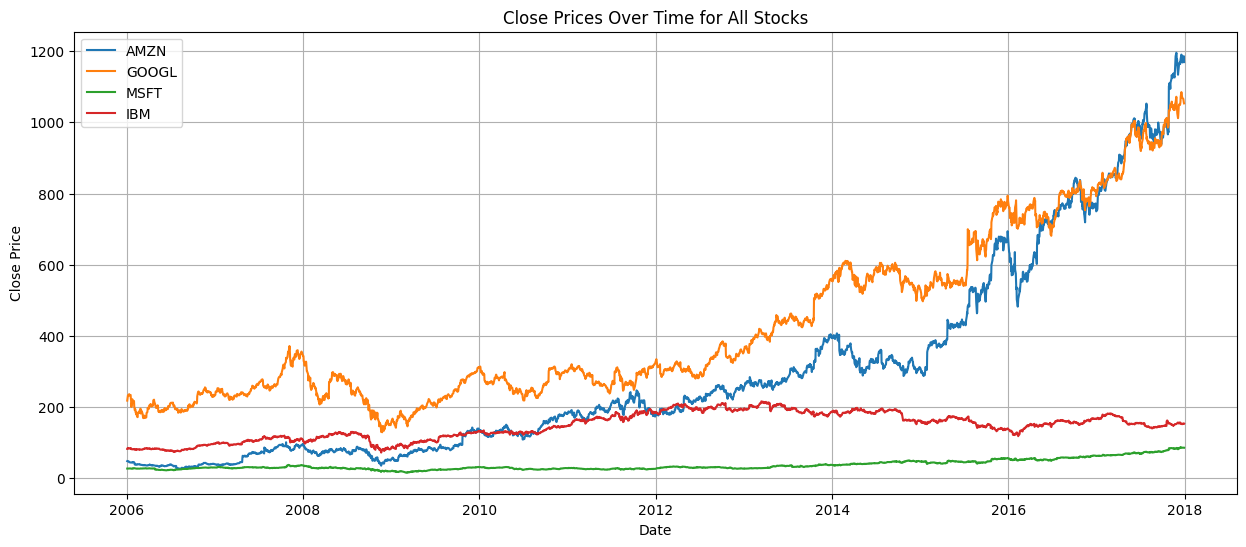

In [34]:
# Checking for patterns in different sequence lengths

plt.figure(figsize=(15, 6))

for stock in ['AMZN', 'GOOGL', 'MSFT', 'IBM']:
    stock_data = dataset[dataset['Name'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

plt.title('Close Prices Over Time for All Stocks')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


### 20–22 days	Covers about 1 month of stock market working days (20–22 trading days) — captures 1 local cycle.
### Hence marking the window size as 22

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [35]:
# Create data instances from the master data frame using decided window size and window stride

X_train, X_test, y_train, y_test = train_test_split_window_function(X_scaled_windows, y_windows, split_ratio=0.7)


In [36]:
# Check the number of data points generated
print(f"Training set size: {len(X_train)} windows")
print(f"Testing set size: {len(X_test)} windows")

Training set size: 8391 windows
Testing set size: 3597 windows


In [37]:
X_train[0]

array([[-0.76336535, -0.76509954, -0.76563529, -0.76313649, -0.35548881],
       [-0.76332267, -0.76560809, -0.76374184, -0.76454519, -0.36097564],
       [-0.76468828, -0.7636163 , -0.76193446, -0.76283767, -0.43960472],
       [-0.76123159, -0.76200591, -0.76103077, -0.76189854, -0.41096756],
       [-0.76729147, -0.76827793, -0.7649898 , -0.76527088, -0.30253225],
       [-0.76788892, -0.76976118, -0.76946523, -0.77137524, -0.27370572],
       [-0.77113224, -0.77421093, -0.77419885, -0.77444877, -0.31992657],
       [-0.77480231, -0.77679602, -0.77493041, -0.77688198, -0.42402221],
       [-0.77612524, -0.7778131 , -0.77531771, -0.77671123, -0.47787767],
       [-0.77838703, -0.78005916, -0.77678083, -0.77841874, -0.43113562],
       [-0.78163035, -0.77891494, -0.77919068, -0.77705273, -0.31032625],
       [-0.77603989, -0.77616034, -0.77402672, -0.77649779, -0.44971742],
       [-0.77719212, -0.77988965, -0.77876035, -0.77876024, -0.32587336],
       [-0.7774055 , -0.77823689, -0.7

In [38]:
y_train[0]

38.33

**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [39]:
# Check if the datasets are compatible inputs to neural networks
# Reshape y_train and y_test if needed
import numpy as np

# Convert all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Now reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Now you can print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8391, 22, 5)
(3597, 22, 5)
(8391, 1)
(3597, 1)


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [40]:
# Create a function that creates a simple RNN model according to the model configuration arguments

def create_rnn_model(input_shape, rnn_units=50, learning_rate=0.001):
    model = Sequential()
    model.add(SimpleRNN(units=rnn_units, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))  
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  
    return model


#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [41]:
# Find an optimal configuration of simple RNN


# Further split training data into train and validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define different configurations to try
configs = [
    {'rnn_units': 32, 'learning_rate': 0.001},
    {'rnn_units': 64, 'learning_rate': 0.001},
    {'rnn_units': 128, 'learning_rate': 0.001},
    {'rnn_units': 64, 'learning_rate': 0.0005},
]

results = []

for config in configs:
    print(f"Training model with config: {config}")
    
    model = create_rnn_model(input_shape=(X_train.shape[1], X_train.shape[2]),
                             rnn_units=config['rnn_units'],
                             learning_rate=config['learning_rate'])
    
    history = model.fit(X_tr, y_tr, validation_data=(X_val, y_val),
                        epochs=20, batch_size=32, verbose=0)
    
    # Evaluate on validation set
    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    
    results.append({
        'config': config,
        'val_loss': val_loss,
        'val_mae': val_mae
    })

# Print all results
for res in results:
    print(f"Config: {res['config']} -> Val Loss: {res['val_loss']:.4f}, Val MAE: {res['val_mae']:.4f}")


Training model with config: {'rnn_units': 32, 'learning_rate': 0.001}
Training model with config: {'rnn_units': 64, 'learning_rate': 0.001}
Training model with config: {'rnn_units': 128, 'learning_rate': 0.001}
Training model with config: {'rnn_units': 64, 'learning_rate': 0.0005}
Config: {'rnn_units': 32, 'learning_rate': 0.001} -> Val Loss: 87357.0000, Val MAE: 184.6221
Config: {'rnn_units': 64, 'learning_rate': 0.001} -> Val Loss: 58761.2773, Val MAE: 130.1331
Config: {'rnn_units': 128, 'learning_rate': 0.001} -> Val Loss: 24020.1836, Val MAE: 66.1840
Config: {'rnn_units': 64, 'learning_rate': 0.0005} -> Val Loss: 87789.8281, Val MAE: 190.5204


### Config: {'rnn_units': 128, 'learning_rate': 0.001} -> Val Loss: 26599, Val MAE: 71.7623 : This has the lowest Validation Loss

In [42]:
# Find the best configuration based on evaluation metrics
# mentioned below

## Configuration Based On Evaluation Metric 

### The lowest Val Loss =26599
### It happened for config {'rnn_units': 128, 'learning_rate': 0.001}
### It also has the lowest Val MAE (71.7623)
### Model with 128 RNN units and learning rate 0.001 performs the best based on validation loss and MAE.

#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [43]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model
def final_vanilla_rnn_model(input_shape, rnn_units=128, learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(units=rnn_units, activation='tanh', input_shape=input_shape),
        tf.keras.layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model


final_model = final_vanilla_rnn_model(X_train.shape[1:], rnn_units=128, learning_rate=0.001)


history = final_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1, 
    verbose=1
)


Epoch 1/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 158471.1094 - mae: 303.8925 - val_loss: 20297.0391 - val_mae: 142.3814
Epoch 2/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 137748.2188 - mae: 265.2885 - val_loss: 12896.2227 - val_mae: 113.2477
Epoch 3/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 125435.9531 - mae: 246.9048 - val_loss: 7652.5244 - val_mae: 86.6354
Epoch 4/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 111528.6094 - mae: 226.9212 - val_loss: 3995.9475 - val_mae: 61.5297
Epoch 5/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 100023.5391 - mae: 211.4726 - val_loss: 1732.5228 - val_mae: 38.1892
Epoch 6/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 95156.7969 - mae: 206.3858 - val_loss: 603.6707 - val_mae: 19.7404
Epoch 7/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 87648.0625 - mae: 197.8624 - val_loss: 416.4258 - val_mae: 12.6510
Epoch 8/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 84618.4531 - mae: 195.4486 - val_loss

Plotting the actual vs predicted values

In [44]:
# Predict on the test data and plot

y_pred = final_model.predict(X_test)

for i in range(5):
    print(f"Predicted value: {y_pred[i][0]:.2f} | Actual value: {y_test[i][0]:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted value: 162.09 | Actual value: 155.07
Predicted value: 161.80 | Actual value: 155.75
Predicted value: 161.64 | Actual value: 156.31
Predicted value: 161.75 | Actual value: 156.01
Predicted value: 162.24 | Actual value: 153.94


It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

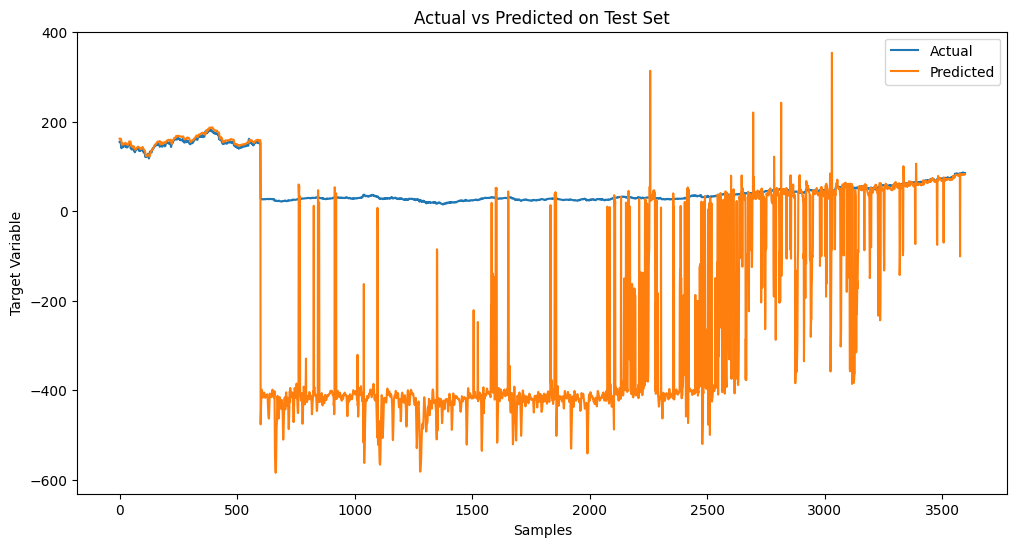

In [45]:
# Compute the performance of the model on the testing data set

plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted on Test Set')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [46]:
# # Define a function to create a model and specify default values for hyperparameters
def lstm_model_building(input_shape,lstm_units=64,dense_units=32,dropout_rate=0.2,learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(units=lstm_units, input_shape=input_shape, return_sequences=False),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(units=dense_units, activation='relu'),
        tf.keras.layers.Dense(1) # final output
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model


#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [47]:
# Find an optimal configuration
configs = [
    {'lstm_units': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001},
    {'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001},
    {'lstm_units': 128, 'dense_units': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001},
    {'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.0005},
]

best_val_loss = float('inf')
best_configuration = None


for config in configs:
    print(f"Training model with configuration: {config}")

    model = lstm_model_building(
        input_shape=X_train.shape[1:],
        lstm_units=config['lstm_units'],
        dense_units=config['dense_units'],
        dropout_rate=config['dropout_rate'],
        learning_rate=config['learning_rate']
    )

    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=32,
        validation_split=0.1,
        verbose=0 
    )

    val_loss = min(history.history['val_loss']) # take best val_loss during training

    print(f"Config: {config} -> Best Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_configuration = config

print("\nBest configuration found unntill now :", best_configuration)

Training model with configuration: {'lstm_units': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001}
Config: {'lstm_units': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001} -> Best Val Loss: 6.8588
Training model with configuration: {'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001}
Config: {'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001} -> Best Val Loss: 7.2271
Training model with configuration: {'lstm_units': 128, 'dense_units': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Config: {'lstm_units': 128, 'dense_units': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001} -> Best Val Loss: 6.1407
Training model with configuration: {'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.0005}
Config: {'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.0005} -> Best Val Loss: 8.2241

Best configuration found unntill now : {'lstm_units': 128, 

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [48]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model
final_model = lstm_model_building(
    input_shape=X_train.shape[1:], 
    lstm_units=128, 
    dense_units=64, 
    dropout_rate=0.3, 
    learning_rate=0.001
)
final_history = final_model.fit(
    X_train, y_train,
    epochs=30,           
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 131984.2188 - mae: 264.3360 - val_loss: 14923.3877 - val_mae: 120.3357
Epoch 2/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 45735.0938 - mae: 137.4546 - val_loss: 29.8360 - val_mae: 4.9225
Epoch 3/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3514.1255 - mae: 31.3549 - val_loss: 6.9730 - val_mae: 1.9580
Epoch 4/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1499.3933 - mae: 23.1364 - val_loss: 23.5029 - val_mae: 4.3556
Epoch 5/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1012.3936 - mae: 20.1828 - val_loss: 6.8630 - val_mae: 1.9261
Epoch 6/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 968.6484 - mae: 19.5576 - val_loss: 11.7439 - val_mae: 2.8516
Epoch 7/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 832.8970 - mae: 18.5978 - val_loss: 8.3094 - val_mae: 2.2357
Epoch 8/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 702.5439 - mae: 17.1865 - val_loss: 133.1986 - val_mae: 11.2190
Ep

In [49]:
# Compute the performance of the model on the testing data set
y_pred = final_model.predict(X_test)


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


Plotting the actual vs predicted values

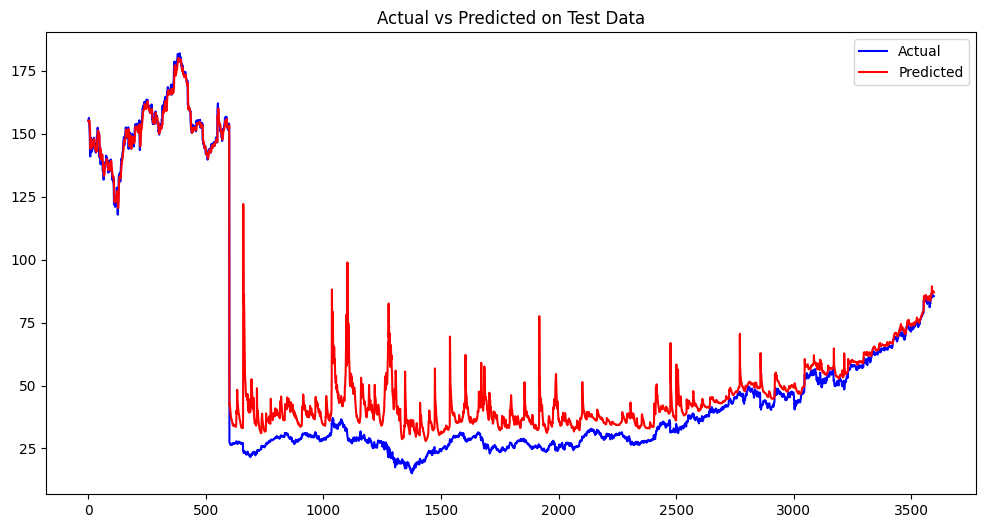

In [50]:
# Predict on the test data
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted on Test Data')
plt.legend()
plt.show()

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [51]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [52]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [53]:
# Find an optimal configuration of simple RNN



In [54]:
# Find the best configuration



In [55]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [56]:
# Compute the performance of the model on the testing data set



In [57]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [58]:
# Find an optimal configuration of advanced RNN



In [59]:
# Find the best configuration



In [60]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [61]:
# Compute the performance of the model on the testing data set



In [62]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

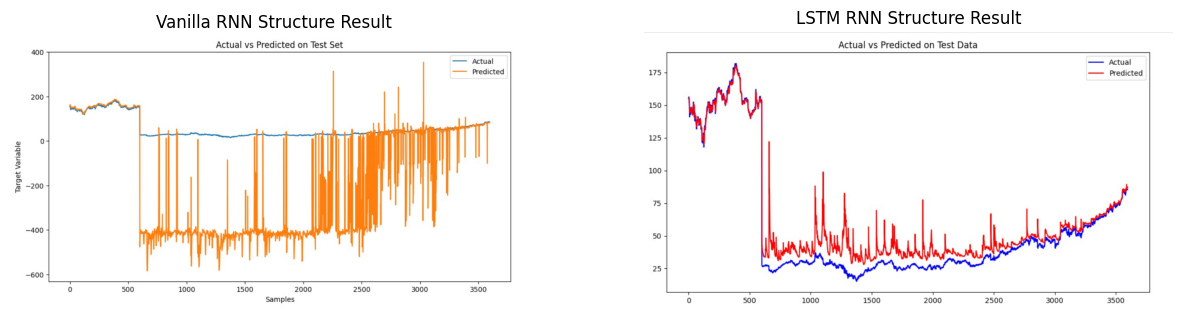

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread(r"F:\IIITBangloreAIML\20. RNN\Assignment\RNN_Stock_Starter_Dataset\vanilla rnn actual vs pred.jpg")
img2 = mpimg.imread(r"F:\IIITBangloreAIML\20. RNN\Assignment\RNN_Stock_Starter_Dataset\lstm output actual vs pred.jpg")

# Create a subplot to show both images
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Display images
axs[0].imshow(img1)
axs[0].axis("off")  # Hide axes
axs[0].set_title("Vanilla RNN Structure Result")

axs[1].imshow(img2)
axs[1].axis("off")
axs[1].set_title("LSTM RNN Structure Result")

plt.show()

## The Vanilla RNN struggled with high variability and failed to maintain stable predictions, especially over longer sequences.
## The LSTM significantly improved trend tracking, showing smoother predictions with fewer deviations.
## _________________________________________________________________________________________________

## Vanilla RNN faced limitations with long-term dependencies, leading to inconsistent predictions as sequence length increased.
## LSTM effectively captured sequential dependencies, maintaining better alignment with actual values.
## _________________________________________________________________________________________________

## Dropout helped stabilize both models, but LSTM showed greater resilience against overfitting due to its gating mechanisms
## Further fine-tuning dropout rates and dense units could further refine stability.